In [1]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

- 178 wine samples
- 13 features about chemical properties
- The first column tell us the type of wines

In [2]:
import pandas as pd

df = pd.read_csv(data_url, header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

## Split the data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=0)

## Standardize the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled.shape

(124, 13)

In [11]:
X_test_scaled.shape

(54, 13)

In [21]:
X_train_scaled.mean()

-3.8899129299521616e-16

In [15]:
import numpy as np
np.mean(X_train)

1      13.033548
2       2.353790
3       2.384919
4      19.801613
5      99.088710
6       2.324839
7       2.064113
8       0.368065
9       1.640887
10      5.089597
11      0.954194
12      2.619355
13    754.822581
dtype: float64

## Compute the Covariance Matrix

Covariance between feature $j$ and feature $k$:

$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(x_{j}^{(i)}-\mu_{j})(x_{k}^{(i)}-\mu_{k})$$

After using the StandardScaler, that normalize feature $j$ for the sample $i$ by doing:

$$ x_{j_{new}}^{i} = \frac{x_{j_{old}}^{i} - \mu_{j}}{\sigma_{j}}$$ 

(same thing for feature $k$), the mean $\mu_{j}$ (or $\mu_{k}$ for feature $k$) becomes 0 (because standardizing the data shift everything by the mean), so the formula is just:


$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(x_{j}^{(i)})(x_{k}^{(i)})$$



In [35]:
import numpy as np
import seaborn as sns
#transpose = X.T
#print(transpose)
#print(transpose.shape)
cov_mat = np.cov(X_train_scaled.T) # <-- Remember to transpose 
# if the columns are the features

In [52]:
cov_mat.shape

(13, 13)

## Computing the Eigenvalues and the Eigenvectors

In [53]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [54]:
eigen_values

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [55]:
eigen_vectors.shape

(13, 13)

In [56]:
eigen_values[0]*eigen_vectors[:,0]

array([-0.6646289 ,  1.19733616, -0.12325558,  1.00218234, -0.74755436,
       -1.90692551, -2.02112491,  1.48056749, -1.48518993,  0.36582417,
       -1.57937726, -1.78508543, -1.43682565])

In [57]:
np.dot(cov_mat, eigen_vectors[:,0])

array([-0.6646289 ,  1.19733616, -0.12325558,  1.00218234, -0.74755436,
       -1.90692551, -2.02112491,  1.48056749, -1.48518993,  0.36582417,
       -1.57937726, -1.78508543, -1.43682565])

In [58]:
eigen_values.shape

(13,)

## Compute the Explained Variance

In [59]:
import matplotlib.pyplot as plt

$$\frac{\lambda_{i}}{\sum_{i}^{d}\lambda_{i}}$$

In [60]:
tot = sum(eigen_values)

In [61]:
var_explained = [(eig_val/tot) for eig_val in sorted(eigen_values, reverse=True)]

In [62]:
np.array(var_explained)*100

array([36.9514686 , 18.43492706, 11.81515909,  7.33425176,  6.42210782,
        5.05172448,  3.95465389,  2.64391832,  2.38931926,  1.62961377,
        1.38002112,  1.17222624,  0.82060857])

In [63]:
cum_var_exp = np.cumsum(var_explained)

In [64]:
cum_var_exp

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

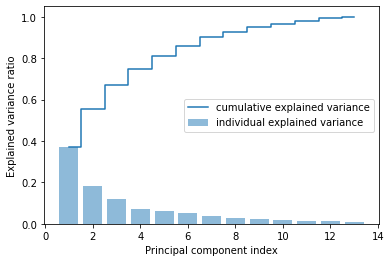

In [75]:
plt.bar(range(1,14), var_explained, alpha=0.5, align="center", label="individual explained variance")
plt.step(range(1,14), cum_var_exp, where="mid", label="cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc = 'best')

## Transform the Features

First: sort the eigenpairs by decreasing order of the eigenvalues.

In [76]:
sorted_index = pd.Series(eigen_values).sort_values(ascending=False).index

In [77]:
W = eigen_vectors[:, sorted_index[:2]]

In [78]:
X_train_pca = X_train_scaled.dot(W)

In [79]:
X_train_pca.shape

(124, 2)

In [80]:
X_test_pca = X_test_scaled.dot(W)

In [81]:
X_test_pca.shape

(54, 2)

In [82]:
y_train.unique()

array([3, 1, 2], dtype=int64)

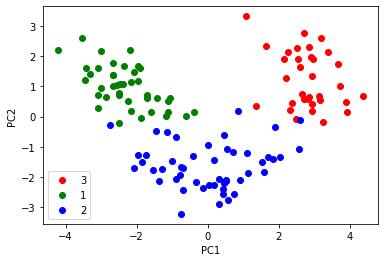

In [83]:
colors = ["r", "g", "b"]

for label, color in zip(y_train.unique(), colors):
    plt.scatter(X_train_pca[y_train==label, 0], 
                X_train_pca[y_train==label, 1], c=color, label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

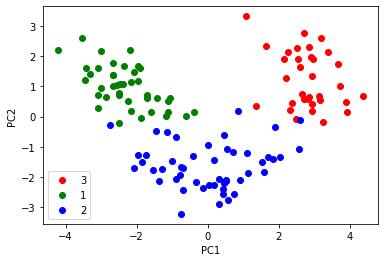

In [85]:
colors = ["r", "g", "b"]

for label, color in zip(y_train.unique(), colors):
    plt.scatter(X_train_PCA[y_train==label, 0], 
                X_train_PCA[y_train==label, 1], c=color, label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()

In [86]:
pca = PCA()

In [87]:
transformed = pca.fit_transform(X_train_scaled)

In [89]:
pd.DataFrame(transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.382990,0.454585,-0.227032,0.579884,-0.579942,-1.733175,0.701805,0.216172,-0.236669,-0.165488,0.297270,0.234897,-0.401620
1,-1.965782,1.653769,1.387093,-1.942201,-0.368549,-0.257300,1.383593,-0.579260,-0.602694,0.367643,-0.143349,-0.272134,-0.014883
2,-2.539076,1.029091,1.325518,-0.067811,-0.553208,0.411532,-0.326127,0.950141,0.592033,0.406601,-0.157395,0.645638,0.138356
3,-1.430108,0.602401,0.555308,-1.052160,0.038826,-0.628058,-0.164067,0.005973,0.518396,-0.300154,-0.184171,-0.037445,0.117466
4,3.141472,0.662150,-1.083932,-0.640890,-0.636696,0.848125,0.756296,-0.680809,0.034301,0.503811,-0.120881,-0.238653,0.003240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.435211,-2.403558,0.991739,-1.106425,-1.298524,0.293926,-0.313247,0.913860,0.650291,0.263113,0.147496,0.138578,-0.300048
120,2.590451,1.638529,0.395761,0.323087,0.451347,-0.245270,-0.029342,0.530460,0.159564,0.249438,-0.087110,0.303243,-0.132585
121,4.353084,0.665360,-1.317374,0.725252,-0.210952,-1.802498,-0.551749,0.500880,0.206470,-0.685423,-0.091529,0.377065,0.385611
122,-1.843154,-1.506884,0.246314,-0.235824,1.082399,0.113853,-1.188298,-0.580442,0.066790,0.885115,-0.173235,0.863942,-1.005597


In [88]:
pd.DataFrame(pca.inverse_transform(transformed))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.712259,2.220487,-0.130259,0.059629,-0.504327,-0.528316,-1.240000,0.841180,-1.052151,-0.292189,-0.200170,-0.821641,-0.629464
1,0.882292,-0.704572,1.175336,-0.090655,2.341479,1.016759,0.662995,1.088743,-0.492935,0.131521,1.339826,0.549313,1.475688
2,0.845856,-0.730230,1.175336,0.811048,0.135979,1.098079,1.163267,-0.644195,1.252496,0.258634,1.068062,0.130811,1.629349
3,0.578661,-0.473646,0.988823,-0.240939,0.776285,0.040922,0.457000,-0.644195,-0.170963,-0.376931,0.660416,0.361708,1.045438
4,-0.526554,0.090839,-0.689799,-0.391223,-0.362037,-1.146346,-1.377330,2.161513,-1.187719,0.851827,-1.015462,-1.499903,-0.183848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.158106,-1.046684,0.466585,1.261899,-1.500359,-0.528316,-0.474879,0.263534,-0.408206,-1.224349,1.611590,0.145242,-0.383607
120,0.445064,1.330995,0.354677,0.961331,0.207124,-0.853595,-1.289047,0.511097,-0.391260,0.936569,-1.151344,-1.528765,-0.014821
121,1.028035,2.297462,-0.577891,0.059629,-1.358069,-2.187238,-1.691226,0.263534,-1.628313,-0.080334,-1.694872,-1.860680,-1.044348
122,-1.303849,-1.080895,-0.316772,0.360196,0.135979,1.716108,0.074440,-1.964528,0.015443,-0.796403,0.162182,0.736917,0.403136


In [90]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.712259,2.220487,-0.130259,0.059629,-0.504327,-0.528316,-1.240000,0.841180,-1.052151,-0.292189,-0.200170,-0.821641,-0.629464
1,0.882292,-0.704572,1.175336,-0.090655,2.341479,1.016759,0.662995,1.088743,-0.492935,0.131521,1.339826,0.549313,1.475688
2,0.845856,-0.730230,1.175336,0.811048,0.135979,1.098079,1.163267,-0.644195,1.252496,0.258634,1.068062,0.130811,1.629349
3,0.578661,-0.473646,0.988823,-0.240939,0.776285,0.040922,0.457000,-0.644195,-0.170963,-0.376931,0.660416,0.361708,1.045438
4,-0.526554,0.090839,-0.689799,-0.391223,-0.362037,-1.146346,-1.377330,2.161513,-1.187719,0.851827,-1.015462,-1.499903,-0.183848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.158106,-1.046684,0.466585,1.261899,-1.500359,-0.528316,-0.474879,0.263534,-0.408206,-1.224349,1.611590,0.145242,-0.383607
120,0.445064,1.330995,0.354677,0.961331,0.207124,-0.853595,-1.289047,0.511097,-0.391260,0.936569,-1.151344,-1.528765,-0.014821
121,1.028035,2.297462,-0.577891,0.059629,-1.358069,-2.187238,-1.691226,0.263534,-1.628313,-0.080334,-1.694872,-1.860680,-1.044348
122,-1.303849,-1.080895,-0.316772,0.360196,0.135979,1.716108,0.074440,-1.964528,0.015443,-0.796403,0.162182,0.736917,0.403136
